Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [2]:
# uncomment the code below and execute this cell
install.packages("tidyverse")
library('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [3]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

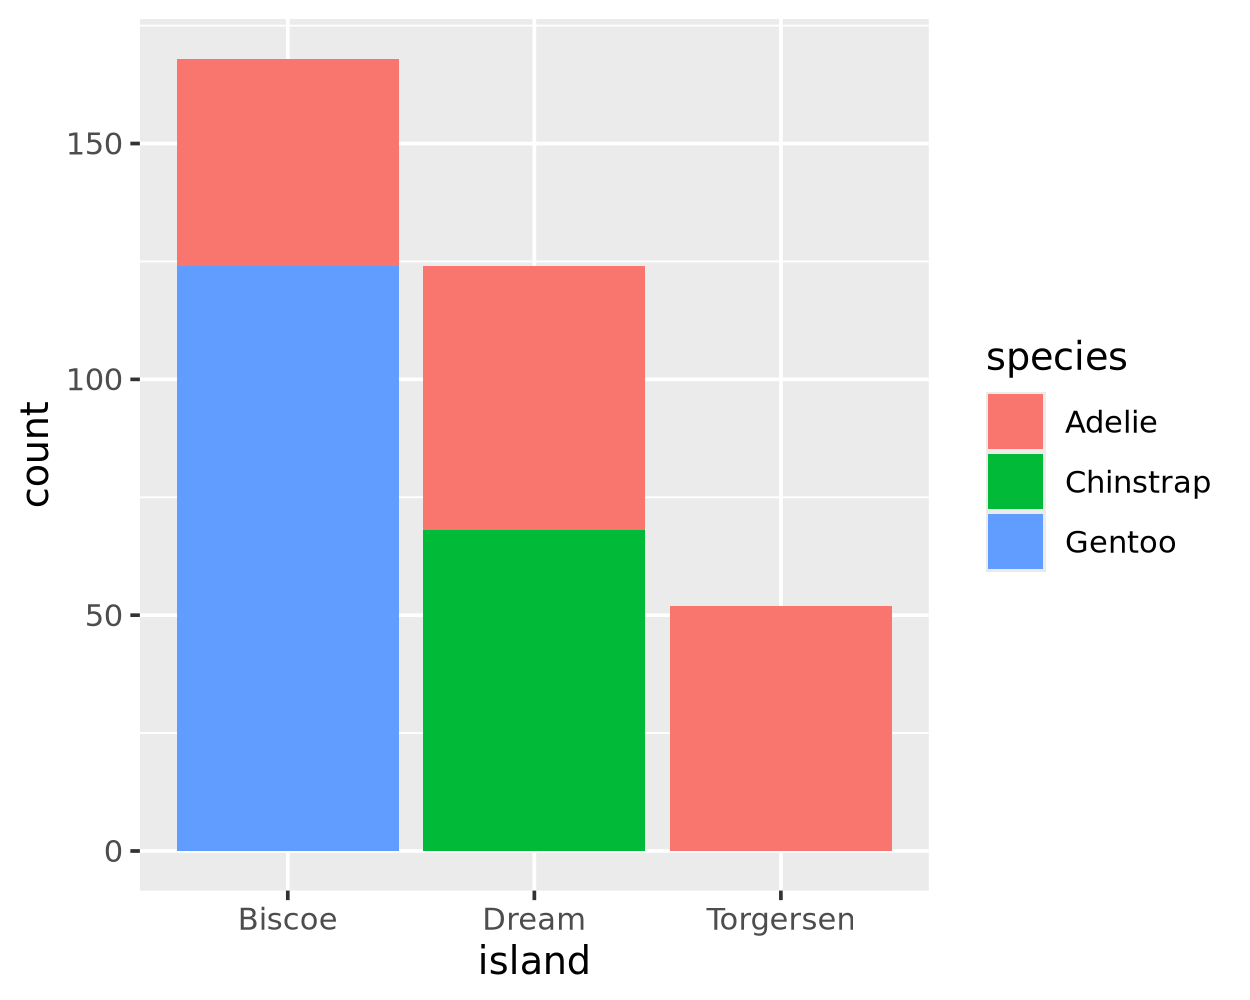

In [4]:
ggplot(data = penguins) +
geom_bar(mapping = aes(x = island, fill = species))

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Adelie penguins were observed in all three islands, but the Torgersen island in particular is only populated with Adelie penguins.

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


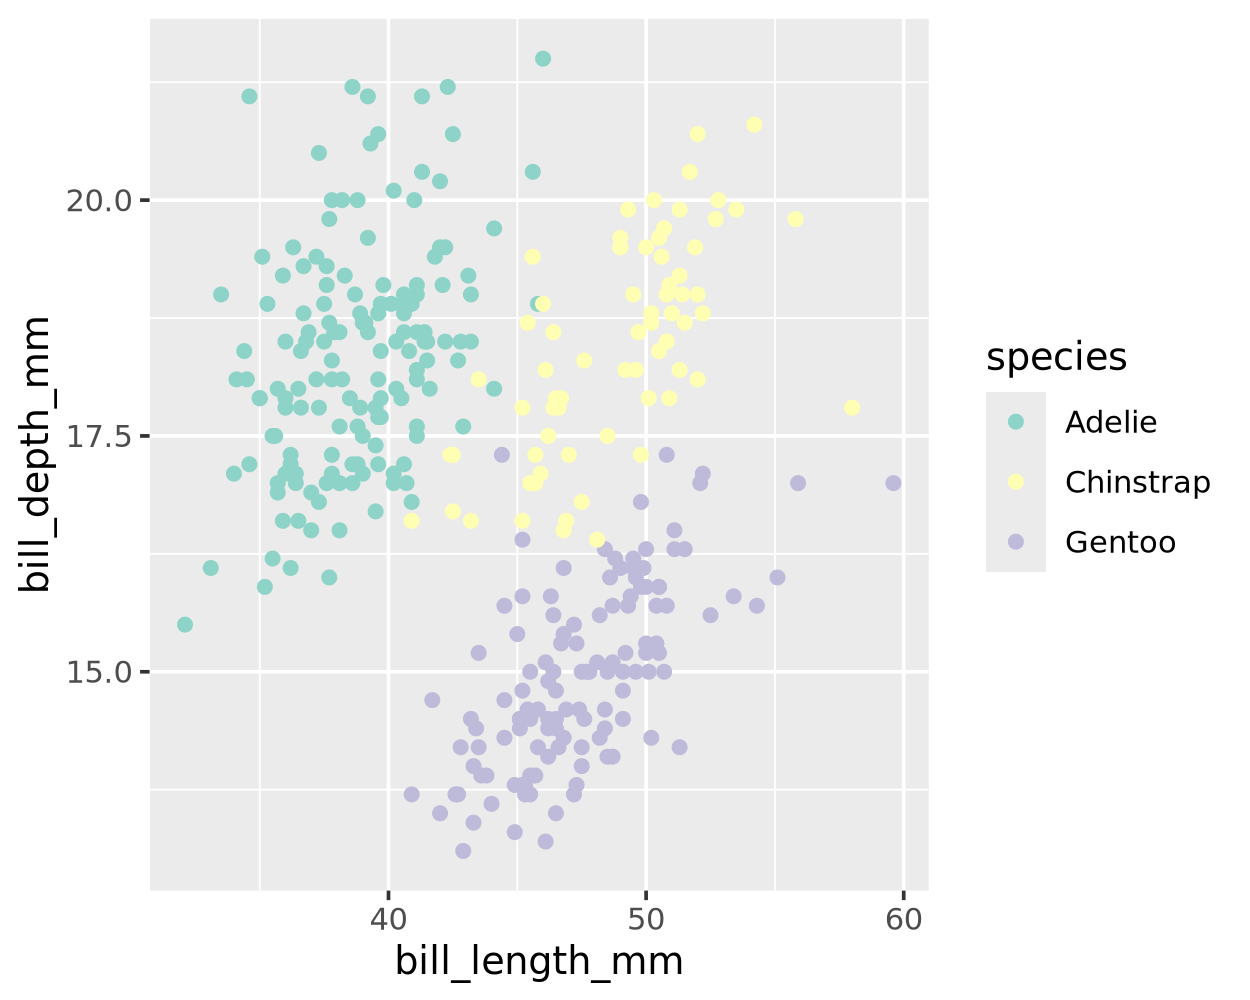

In [14]:
ggplot(data = penguins) +
geom_point(mapping = aes( x= bill_length_mm, y = bill_depth_mm, color = species))+
scale_color_brewer(palette = "Set3")

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


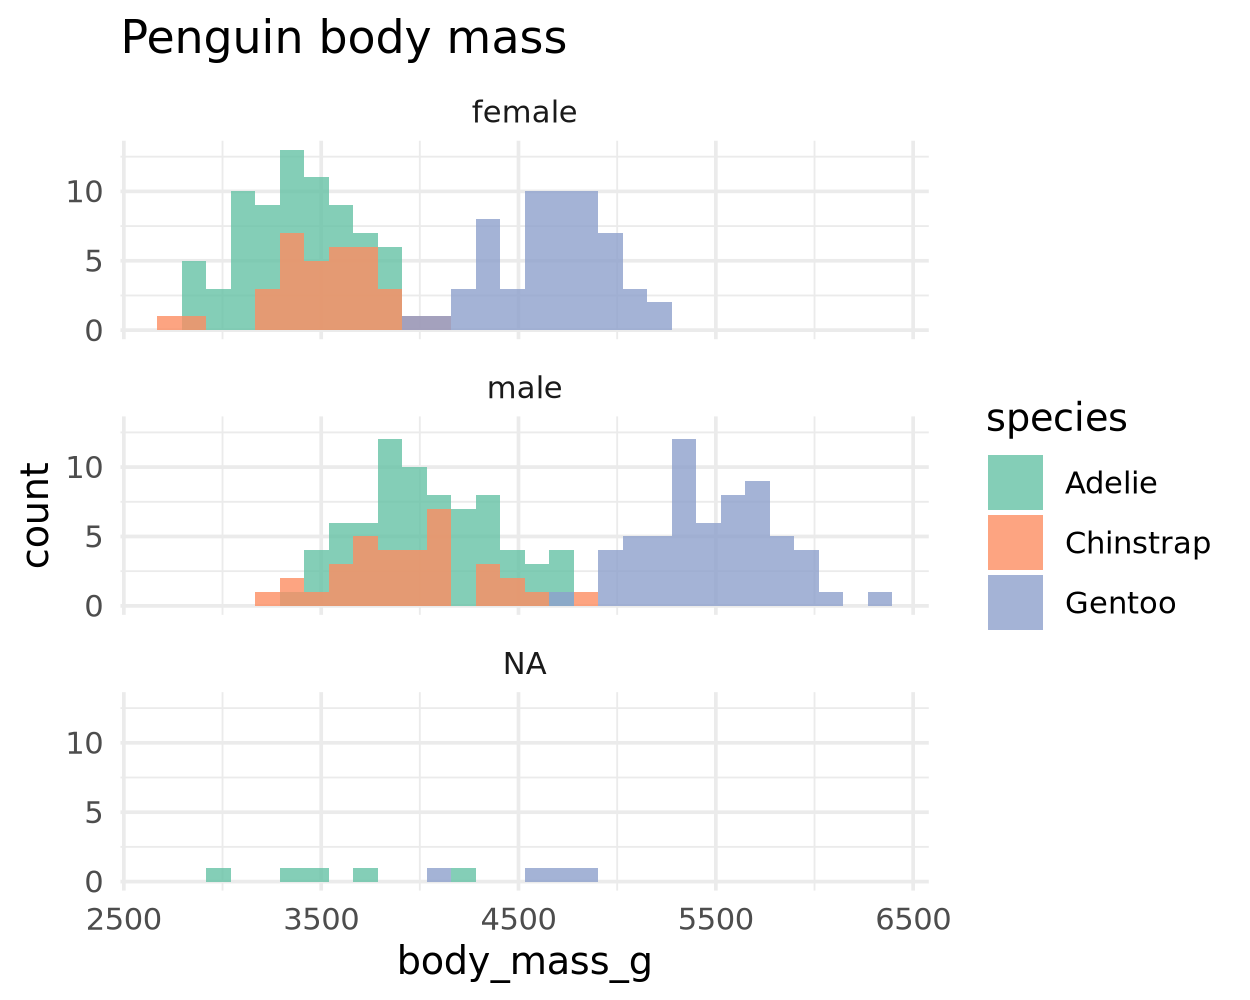

In [22]:
ggplot(data = penguins, aes(x = body_mass_g, fill = species))+
geom_histogram(position = "identity", alpha = 0.8, bins = 30)+
facet_wrap(~sex, ncol = 1)+
labs(
    title = "Penguin body mass",
    x = "body_mass_g", y = "count") +
scale_fill_brewer(palette = "Set2") +
theme_minimal()

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


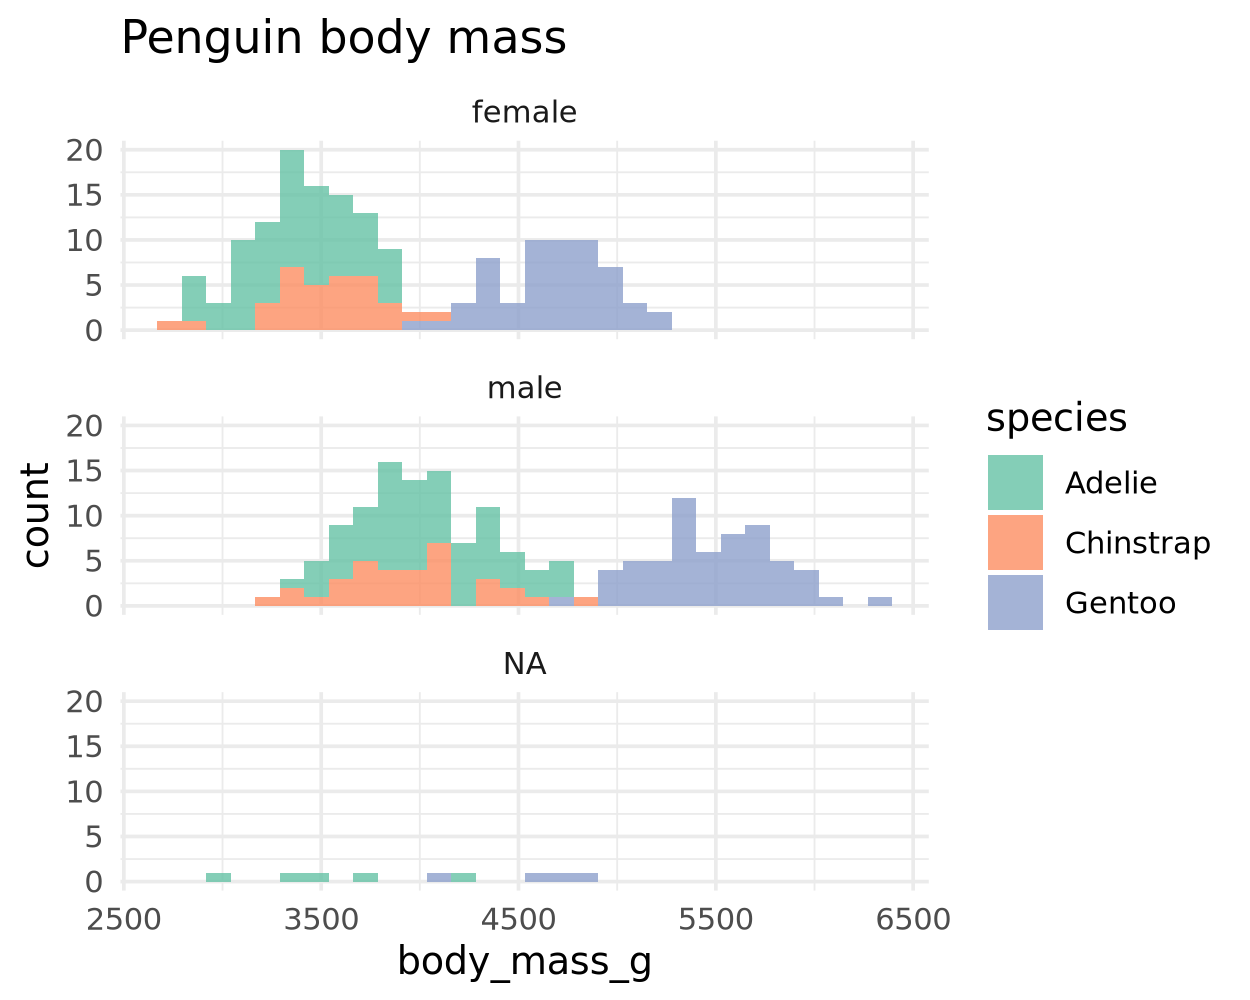

In [23]:
ggplot(data = penguins, aes(x = body_mass_g, fill = species))+
geom_histogram( alpha = 0.8, bins = 30)+
facet_wrap(~sex, ncol = 1)+
labs(
    title = "Penguin body mass",
    x = "body_mass_g", y = "count") +
scale_fill_brewer(palette = "Set2") +
theme_minimal()

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

When we don't have position, the bars don't overlap, but the stack on top of one another.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [35]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [36]:
txhousing <- subset(txhousing, select = -inventory)
glimpse(txhousing)
print(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…
# A tibble: 8,602 × 8
   city     year month sales   volume median listings  date
   <chr>   <int> <int> <dbl>    <dbl>  <dbl>    <dbl> <dbl>
 1 Abilene  2000     1    72  5380000  71400      701 2000 
 2 Abilene  2000     2    98  6505000  58700      746 2000.
 3 Abilene  2000     3   130  9285000  58100      784 2000.
 4 Abilene  200

Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [33]:
dallas_sub <- filter(txhousing, city == "Dallas" & year %in% c(2012,2013))
print(dallas_sub)

# A tibble: 24 × 8
   city    year month sales     volume median listings  date
   <chr>  <int> <int> <dbl>      <dbl>  <dbl>    <dbl> <dbl>
 1 Dallas  2012     1  2555  509458081 150800    16721 2012 
 2 Dallas  2012     2  3085  634067291 157100    17173 2012.
 3 Dallas  2012     3  4068  898320563 167300    17433 2012.
 4 Dallas  2012     4  4291  983333297 168700    17632 2012.
 5 Dallas  2012     5  5004 1175419749 175100    17726 2012.
 6 Dallas  2012     6  5196 1209024869 177900    17587 2012.
 7 Dallas  2012     7  4859 1117428758 176000    17314 2012.
 8 Dallas  2012     8  5264 1168296112 174200    16611 2013.
 9 Dallas  2012     9  4151  921678400 173500    15994 2013.
10 Dallas  2012    10  4214  885330428 166700    15008 2013.
# ℹ 14 more rows


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [38]:
dallas_sub <- mutate(dallas_sub,
                     prct_sold = sales/listings*100)
print(dallas_sub)

# A tibble: 24 × 9
   city    year month sales     volume median listings  date prct_sold
   <chr>  <int> <int> <dbl>      <dbl>  <dbl>    <dbl> <dbl>     <dbl>
 1 Dallas  2012     1  2555  509458081 150800    16721 2012       15.3
 2 Dallas  2012     2  3085  634067291 157100    17173 2012.      18.0
 3 Dallas  2012     3  4068  898320563 167300    17433 2012.      23.3
 4 Dallas  2012     4  4291  983333297 168700    17632 2012.      24.3
 5 Dallas  2012     5  5004 1175419749 175100    17726 2012.      28.2
 6 Dallas  2012     6  5196 1209024869 177900    17587 2012.      29.5
 7 Dallas  2012     7  4859 1117428758 176000    17314 2012.      28.1
 8 Dallas  2012     8  5264 1168296112 174200    16611 2013.      31.7
 9 Dallas  2012     9  4151  921678400 173500    15994 2013.      26.0
10 Dallas  2012    10  4214  885330428 166700    15008 2013.      28.1
# ℹ 14 more rows


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [39]:
dallas_summary <- dallas_sub %>%
group_by(month) %>%
summarise(avg_percent_listings = mean(prct_sold, na.rm = TRUE)) %>%
arrange(month)
glimpse(dallas_summary)

Rows: 12
Columns: 2
$ month                <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
$ avg_percent_listings <dbl> 20.54462, 23.47328, 32.24472, 34.46954, 38.20168,…


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [40]:
dallas_summary %>%
slice_max(order_by = avg_percent_listings, n = 3)

month,avg_percent_listings
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [42]:
txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") |>
  mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


This code does the same operation performed using all my previous codes meaning providing the top 3 months with the highest average
percentage of listing sold in Dallas. It is just simpler as it performs all the operations directly within the home dataset "txhousing"
instead of creating mutliple sub-dataset for the different steps in the process as I did.